In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', index_col=None)
# del_cols = ['id',
#             'member_id',
#             'Unnamed: 0',
#             'annual_inc_joint',
#             'dti_joint',
#             'verification_status_joint',
#             'open_acc_6m',
#             'open_il_6m',
#             'open_il_12m','open_il_24m',
#             'mths_since_rcnt_il',
#             'total_bal_il',
#             'il_util',
#             'open_rv_12m',
#             'open_rv_24m',
#             'max_bal_bc',
#             'all_util',
#             'inq_fi',
#             'total_cu_tl',
#             'inq_last_12m']
# df = data.drop(columns=del_cols, axis=1, inplace=True)
pd.set_option('display.max_columns', None)
df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3335338389.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv', index_col=None)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df))]

In [5]:
null_col

inq_last_12m                   466285
total_bal_il                   466285
dti_joint                      466285
verification_status_joint      466285
annual_inc_joint               466285
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
il_util                        466285
open_rv_24m                    466285
total_cu_tl                    466285
inq_fi                         466285
max_bal_bc                     466285
all_util                       466285
open_rv_12m                    466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
dtype: int64

In [6]:
dropped = list(null_col.index.values) #Making list of column names having null values greater than 35%
df.drop(labels = dropped,axis=1,inplace = True) #Droping those columns
# drop unused columns
df.drop(columns = ['Unnamed: 0','id', 'member_id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code','policy_code',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_length                  445277 non-null  object 
 8   home_ownership              466285 non-null  object 
 9   annual_inc                  466281 non-null  float64
 10  verification_status         466285 non-null  object 
 11  issue_d                     466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  pymnt_plan    

# Cleaning

In [8]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,2588.677225,3123.913796,0.009085,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,2483.809661,5554.737393,0.108648,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,957.280000,312.620000,0.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,1818.880000,545.960000,0.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,3304.530000,3187.510000,0.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,24205.620000,36234.440000,20.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [9]:
df['loan_status'].value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [10]:
# make the following value below is 0 (bad status), and the other are 1 (good)

df['target'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off',
                                                       'Default',
                                                       'Late (31-120 days)',
                                                       'Does not meet the credit policy. Status:Charged Off']),0, 1)
df.drop(columns = ['loan_status'], inplace = True)

In [11]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,861.07,Jan-15,171.62,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,603.65,Jun-14,649.91,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,2209.33,Jan-15,357.48,Jan-15,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,1009.07,Jan-16,67.79,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,n,debt_consolidation,TX,19.85,0.0,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,4557.36,Jan-16,432.64,Jan-16,0.0,INDIVIDUAL,0.0,0.0,294998.0,29900.0,1
466281,22000,22000,22000.0,60 months,19.97,582.50,D,10+ years,MORTGAGE,78000.0,Verified,Jan-14,n,debt_consolidation,TN,18.45,0.0,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,2840.88,Dec-14,17.50,Jan-16,0.0,INDIVIDUAL,0.0,0.0,221830.0,39400.0,0
466282,20700,20700,20700.0,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,Verified,Jan-14,n,debt_consolidation,OH,25.65,0.0,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6072.29,Jan-16,514.34,Dec-15,0.0,INDIVIDUAL,0.0,0.0,73598.0,13100.0,1
466283,2000,2000,2000.0,36 months,7.90,62.59,A,3 years,OWN,83000.0,Verified,Jan-14,n,credit_card,CA,5.39,3.0,Feb-03,1.0,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,126.58,Dec-14,1500.68,Apr-15,0.0,INDIVIDUAL,0.0,0.0,591610.0,53100.0,1


# Splitting dataset into train and test

In [12]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [13]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
456615,15000,15000,15000.0,36 months,8.90,476.30,A,7 years,MORTGAGE,80000.0,Source Verified,Jan-14,n,credit_card,WI,17.01,1.0,Dec-95,0.0,19.0,0.0,20699,59.0,32.0,w,0.00,0.00,16561.02000,16561.02,1561.02,Jun-15,8940.22,Jan-16,0.0,INDIVIDUAL,0.0,0.0,143586.0,35100.0
451541,8000,8000,8000.0,60 months,18.25,204.24,D,10+ years,OWN,44000.0,Verified,Jan-14,n,other,TN,23.46,0.0,Jul-95,1.0,12.0,0.0,13245,32.1,25.0,f,5746.54,5746.54,4697.52000,4697.52,2444.06,Jan-16,204.24,Jan-16,0.0,INDIVIDUAL,0.0,0.0,180443.0,41300.0
394474,12150,12150,12100.0,60 months,18.92,314.65,D,3 years,OWN,27000.0,Source Verified,May-14,n,credit_card,TN,31.07,1.0,Sep-90,0.0,9.0,0.0,7172,73.2,22.0,f,9282.24,9244.04,6293.00000,6267.10,3425.24,Jan-16,314.65,Jan-16,0.0,INDIVIDUAL,0.0,0.0,34197.0,9800.0
110294,10000,10000,10000.0,36 months,6.03,304.36,A,3 years,MORTGAGE,33000.0,Not Verified,Aug-13,n,debt_consolidation,TN,9.16,0.0,Dec-01,0.0,5.0,0.0,2138,21.2,17.0,w,0.00,0.00,10858.01000,10858.01,858.01,Sep-15,3553.37,Sep-15,0.0,INDIVIDUAL,0.0,0.0,77959.0,10100.0
139343,15825,15825,15825.0,36 months,12.12,526.53,B,10+ years,MORTGAGE,59000.0,Verified,May-13,n,debt_consolidation,WA,17.94,0.0,Jun-79,0.0,7.0,0.0,30326,93.6,31.0,f,0.00,0.00,4736.52000,4736.52,1301.35,Feb-14,526.53,Jan-16,0.0,INDIVIDUAL,0.0,0.0,187370.0,32400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163633,22800,22800,22800.0,60 months,16.29,557.98,C,10+ years,MORTGAGE,85000.0,Verified,Feb-13,n,debt_consolidation,CA,15.12,0.0,Jul-99,0.0,15.0,0.0,18556,67.5,22.0,f,12158.37,12158.37,18968.20000,18968.20,8326.57,Jan-16,557.98,Jan-16,0.0,INDIVIDUAL,0.0,0.0,29071.0,27500.0
399306,20275,20275,20175.0,36 months,12.49,678.18,B,7 years,MORTGAGE,48000.0,Verified,May-14,n,credit_card,KS,22.70,0.0,Jun-01,0.0,7.0,0.0,33997,75.0,20.0,w,9947.82,9898.75,13563.60000,13496.70,3236.42,Jan-16,678.18,Jan-16,0.0,INDIVIDUAL,0.0,0.0,186530.0,45300.0
57787,25000,25000,24975.0,60 months,14.30,585.61,C,NaN,MORTGAGE,65530.0,Verified,Nov-13,n,debt_consolidation,CO,22.91,0.0,Jun-94,0.0,8.0,0.0,11848,68.1,24.0,f,0.00,0.00,30285.29598,30255.01,5285.30,Aug-15,19162.85,Dec-15,0.0,INDIVIDUAL,0.0,0.0,290599.0,17400.0
81641,10000,10000,10000.0,36 months,15.10,347.15,C,4 years,MORTGAGE,50000.0,Not Verified,Oct-13,n,debt_consolidation,FL,14.24,1.0,Aug-07,1.0,7.0,0.0,9693,65.1,9.0,w,2936.24,2936.24,9373.05000,9373.05,2309.29,Jan-16,347.15,Jan-16,0.0,INDIVIDUAL,0.0,0.0,27715.0,14900.0


# Handling categorical

In [14]:
list(X_train.select_dtypes(include=['object']))

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

### term

In [15]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
def term_handler(df):
    df['term'] = pd.to_numeric(df['term'].str.replace(r'\D', ''))

In [17]:
term_handler(X_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3918565413.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['term'] = pd.to_numeric(df['term'].str.replace(r'\D', ''))


In [18]:
X_train.term.unique()

array([36, 60], dtype=int64)

### emp_length

In [19]:
X_train.emp_length.unique()

array(['7 years', '10+ years', '3 years', '4 years', '2 years', nan,
       '1 year', '6 years', '< 1 year', '5 years', '8 years', '9 years'],
      dtype=object)

In [20]:
# get any numerical value, and fill nan to 0
def emp_length_handler(df):
    df['emp_length'] = df['emp_length'].str.replace(r'\D', '')
    df['emp_length'].fillna(value = 0, inplace = True)
    df['emp_length'] = pd.to_numeric(df['emp_length'])

In [21]:
emp_length_handler(X_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3382071043.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace(r'\D', '')


In [22]:
X_train.emp_length.unique()

array([ 7, 10,  3,  4,  2,  0,  1,  6,  5,  8,  9], dtype=int64)

### date columns handler

In [23]:
# convert date columns to datetime format and create a new column as a difference between today and the respective date
def date_columnhandler(df, column):
    # store current month
    today_date = pd.to_datetime('2022-06-04')
    # convert to datetime format
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df['m_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df['m_since_' + column] = df['m_since_' + column].apply(lambda x: df['m_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df.drop(columns = [column], inplace = True)

# apply to X_train
date_columnhandler(X_train, 'earliest_cr_line')
date_columnhandler(X_train, 'issue_d')
date_columnhandler(X_train, 'last_pymnt_d')
date_columnhandler(X_train, 'last_credit_pull_d')

In [24]:
print(X_train['m_since_earliest_cr_line'].describe())
print(X_train['m_since_issue_d'].describe())
print(X_train['m_since_last_pymnt_d'].describe())
print(X_train['m_since_last_credit_pull_d'].describe())

count    373003.000000
mean        296.293609
std          86.372742
min         127.000000
25%         237.000000
50%         279.000000
75%         339.000000
max         641.000000
Name: m_since_earliest_cr_line, dtype: float64
count    373028.000000
mean        105.252485
std          14.339074
min          90.000000
25%          95.000000
50%         101.000000
75%         111.000000
max         180.000000
Name: m_since_issue_d, dtype: float64
count    372717.000000
mean         85.289989
std          12.803859
min          77.000000
25%          77.000000
50%          78.000000
75%          89.000000
max         174.000000
Name: m_since_last_pymnt_d, dtype: float64
count    372998.000000
mean         81.041810
std           9.630887
min          77.000000
25%          77.000000
50%          77.000000
75%          79.000000
max         181.000000
Name: m_since_last_credit_pull_d, dtype: float64


<AxesSubplot:>

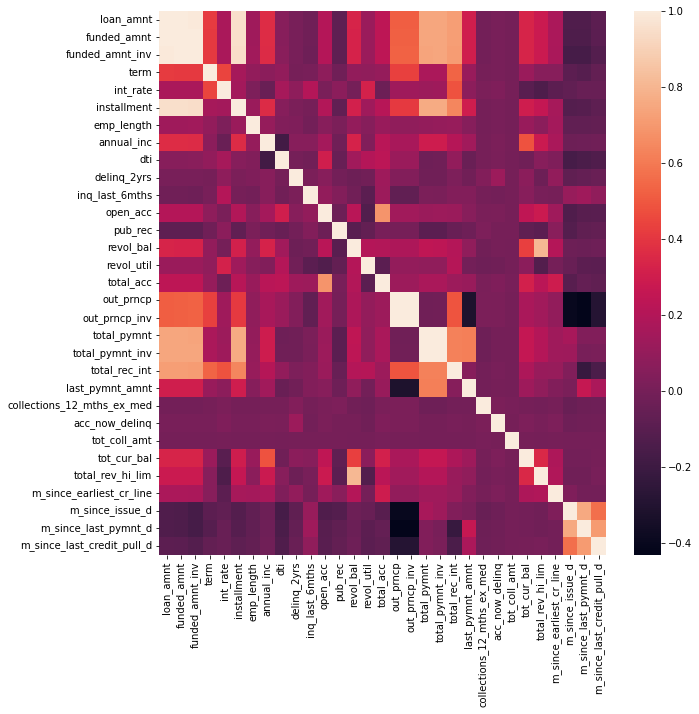

In [25]:
heatmap = X_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(heatmap)

In [26]:
cat_cols = list(X_train.select_dtypes(include=['object']))

In [27]:
for i in cat_cols:
    print(X_train[i].unique())

['A' 'D' 'B' 'F' 'C' 'E' 'G']
['MORTGAGE' 'OWN' 'RENT' 'OTHER' 'NONE']
['Source Verified' 'Verified' 'Not Verified']
['n' 'y']
['credit_card' 'other' 'debt_consolidation' 'car' 'home_improvement'
 'small_business' 'major_purchase' 'house' 'medical' 'vacation' 'wedding'
 'moving' 'educational' 'renewable_energy']
['WI' 'TN' 'WA' 'FL' 'IL' 'TX' 'NY' 'WV' 'AL' 'NV' 'MD' 'VA' 'CA' 'NH'
 'DE' 'OH' 'NJ' 'NC' 'NM' 'AZ' 'CO' 'MA' 'UT' 'GA' 'OR' 'SC' 'PA' 'IN'
 'OK' 'MN' 'HI' 'MI' 'CT' 'AK' 'MO' 'KY' 'AR' 'DC' 'KS' 'RI' 'LA' 'WY'
 'MS' 'MT' 'SD' 'VT' 'IA' 'NE' 'ID' 'ME']
['w' 'f']
['INDIVIDUAL']


In [28]:
for i in cat_cols:
    print(X_test[i].unique())

['C' 'A' 'B' 'D' 'E' 'F' 'G']
['OWN' 'RENT' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
['Source Verified' 'Not Verified' 'Verified']
['n' 'y']
['home_improvement' 'debt_consolidation' 'credit_card' 'major_purchase'
 'car' 'other' 'small_business' 'vacation' 'house' 'moving' 'medical'
 'renewable_energy' 'wedding' 'educational']
['FL' 'GA' 'AZ' 'TX' 'NJ' 'NM' 'CA' 'WA' 'UT' 'IN' 'OK' 'NY' 'IL' 'NV'
 'MO' 'OH' 'TN' 'KS' 'WI' 'MA' 'MN' 'PA' 'NC' 'SD' 'VA' 'MD' 'KY' 'WY'
 'AR' 'CT' 'OR' 'RI' 'DC' 'MI' 'AL' 'MS' 'NH' 'HI' 'CO' 'DE' 'WV' 'MT'
 'SC' 'LA' 'AK' 'VT' 'ID' 'NE' 'IA' 'ME']
['w' 'f']
['INDIVIDUAL']


In [29]:
X_train.home_ownership.value_counts()

MORTGAGE    188739
RENT        150776
OWN          33313
OTHER          159
NONE            41
Name: home_ownership, dtype: int64

In [30]:
X_test.home_ownership.value_counts()

MORTGAGE    47136
RENT        37697
OWN          8391
OTHER          23
NONE            9
ANY             1
Name: home_ownership, dtype: int64

In [31]:
# drop identifically unused feature
iden_drop = ['addr_state','application_type']

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, iden_drop)

In [32]:
cat_cols

['grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'application_type']

In [33]:
X_train = pd.get_dummies(X_train, prefix=['grade',
                                          'home_ownership',
                                          'verification_status',
                                          'purpose',
                                          'pymnt_plan',
                                          'initial_list_status'], prefix_sep=':')

## update test set

In [34]:
emp_length_handler(X_test)
term_handler(X_test)
date_columnhandler(X_test, 'earliest_cr_line')
date_columnhandler(X_test, 'issue_d')
date_columnhandler(X_test, 'last_pymnt_d')
date_columnhandler(X_test, 'last_credit_pull_d')
col_to_drop(X_test, iden_drop)
X_test = pd.get_dummies(X_test, prefix=['grade',
                                         'home_ownership',
                                         'verification_status',
                                         'purpose',
                                         'pymnt_plan',
                                         'initial_list_status'], prefix_sep=':')
# reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3382071043.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace(r'\D', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_14780\3918565413.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['term'] = pd.to_numeric(df['term'].str.replace(r'\D', ''))


In [35]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
# numeric_columns = X_train.select_dtypes(include='number').columns
# X_train[numeric_columns] = X_train[numeric_columns].fillna(X_train.mean())

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373028 entries, 456615 to 38736
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            373028 non-null  int64  
 1   funded_amnt                          373028 non-null  int64  
 2   funded_amnt_inv                      373028 non-null  float64
 3   term                                 373028 non-null  int64  
 4   int_rate                             373028 non-null  float64
 5   installment                          373028 non-null  float64
 6   emp_length                           373028 non-null  int64  
 7   annual_inc                           373028 non-null  float64
 8   dti                                  373028 non-null  float64
 9   delinq_2yrs                          373028 non-null  float64
 10  inq_last_6mths                       373028 non-null  float64
 11  open_acc 

# Prediction

In [37]:
logreg = LogisticRegression(max_iter=100, class_weight = 'balanced')
logreg.fit(X_train, y_train)

C:\Users\USER\anaconda3\envs\robs\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [38]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(logreg, X_train, y_train, scoring = 'roc_auc', cv = cv)

C:\Users\USER\anaconda3\envs\robs\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\envs\robs\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Text(0.5, 1.0, 'PR curve')

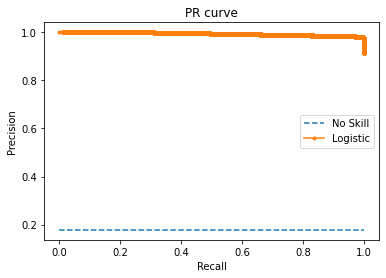

In [51]:
# draw a PR curve
# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.959


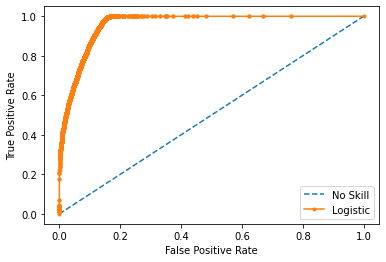

In [43]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [47]:
from sklearn.metrics import accuracy_score
pred = logreg.predict(X_test)
accuracy_score(y_test ,pred)

0.980484038731677

In [53]:
print(confusion_matrix(y_test,pred))

[[ 8545  1649]
 [  171 82892]]


In [49]:
roc_auc_score(y_test ,lr_probs)

0.9592680982002615

In [52]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,m_since_earliest_cr_line,m_since_issue_d,m_since_last_pymnt_d,m_since_last_credit_pull_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:n,purpose:y,pymnt_plan:car,pymnt_plan:credit_card,pymnt_plan:debt_consolidation,pymnt_plan:educational,pymnt_plan:home_improvement,pymnt_plan:house,pymnt_plan:major_purchase,pymnt_plan:medical,pymnt_plan:moving,pymnt_plan:other,pymnt_plan:renewable_energy,pymnt_plan:small_business,pymnt_plan:vacation,pymnt_plan:wedding,initial_list_status:f,initial_list_status:w
456615,15000,15000,15000.0,36,8.90,476.30,7,80000.0,17.01,1.0,0.0,19.0,0.0,20699,59.0,32.0,0.00,0.00,16561.02,16561.02,1561.02,8940.22,0.0,0.0,0.0,143586.0,35100.0,318.0,101.0,84.0,77.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
451541,8000,8000,8000.0,60,18.25,204.24,10,44000.0,23.46,0.0,1.0,12.0,0.0,13245,32.1,25.0,5746.54,5746.54,4697.52,4697.52,2444.06,204.24,0.0,0.0,0.0,180443.0,41300.0,323.0,101.0,77.0,77.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
394474,12150,12150,12100.0,60,18.92,314.65,3,27000.0,31.07,1.0,0.0,9.0,0.0,7172,73.2,22.0,9282.24,9244.04,6293.00,6267.10,3425.24,314.65,0.0,0.0,0.0,34197.0,9800.0,381.0,97.0,77.0,77.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
110294,10000,10000,10000.0,36,6.03,304.36,3,33000.0,9.16,0.0,0.0,5.0,0.0,2138,21.2,17.0,0.00,0.00,10858.01,10858.01,858.01,3553.37,0.0,0.0,0.0,77959.0,10100.0,246.0,106.0,81.0,81.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
139343,15825,15825,15825.0,36,12.12,526.53,10,59000.0,17.94,0.0,0.0,7.0,0.0,30326,93.6,31.0,0.00,0.00,4736.52,4736.52,1301.35,526.53,0.0,0.0,0.0,187370.0,32400.0,516.0,109.0,100.0,77.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
pred_prob = logreg.predict_proba(X_test)
pred_prob

array([[1.13016371e-01, 8.86983629e-01],
       [2.53367483e-01, 7.46632517e-01],
       [3.15568913e-06, 9.99996844e-01],
       ...,
       [3.69889433e-01, 6.30110567e-01],
       [2.63774329e-01, 7.36225671e-01],
       [3.43597400e-02, 9.65640260e-01]])

In [60]:
df_pred_prob = pd.DataFrame(pred_prob, columns = ['prob_0', 'prob_1'])
df_pred_target = pd.DataFrame(logreg.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test.values, columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_pred_prob, df_pred_target], axis=1)
dfx

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,1.130164e-01,8.869836e-01,1
1,1,2.533675e-01,7.466325e-01,1
2,1,3.155689e-06,9.999968e-01,1
3,1,1.850318e-07,9.999998e-01,1
4,0,1.000000e+00,2.539355e-11,0
...,...,...,...,...
93252,1,2.692421e-01,7.307579e-01,1
93253,1,2.282885e-01,7.717115e-01,1
93254,1,3.698894e-01,6.301106e-01,1
93255,1,2.637743e-01,7.362257e-01,1


In [59]:
y_test.values

array([1, 1, 1, ..., 1, 1, 1])

In [61]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93257 entries, 0 to 93256
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Actual Outcome    93257 non-null  int32  
 1   prob_0            93257 non-null  float64
 2   prob_1            93257 non-null  float64
 3   predicted_TARGET  93257 non-null  int32  
dtypes: float64(2), int32(2)
memory usage: 2.1 MB


In [62]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [63]:
dfx

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.11302,0.88698,1
1,1,0.25337,0.74663,1
2,1,0.00000,1.00000,1
3,1,0.00000,1.00000,1
4,0,1.00000,0.00000,0
...,...,...,...,...
93252,1,0.26924,0.73076,1
93253,1,0.22829,0.77171,1
93254,1,0.36989,0.63011,1
93255,1,0.26377,0.73623,1


In [73]:
dfx['Decile_rank'] = pd.qcut(dfx['prob_0'], 10, labels = False)

In [74]:
dfx

,Actual Outcome,prob_0,prob_1,predicted_TARGET,Decile_rank
4403,1,0.00000,1.00000,1,0
34785,1,0.00000,1.00000,1,0
7154,1,0.00000,1.00000,1,0
85598,1,0.00000,1.00000,1,0
66486,1,0.00000,1.00000,1,0
...,...,...,...,...,...
65445,0,1.00000,0.00000,0,9
43938,0,1.00000,0.00000,0,9
51555,0,1.00000,0.00000,0,9
44009,0,1.00000,0.00000,0,9


In [79]:
dfx.to_excel('dfx.xlsx')